In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from utils.preprocessing import log_transform
from sklearn.decomposition import PCA, FastICA as ICA

In [10]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

# os.chdir('/media/soham/New Volume/GitHub/BTP')

analyte2 = pd.read_csv('data/exponential/Exponential_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte1 = pd.read_csv('data/exponential/Exponential_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte3 = pd.read_csv('data/exponential/Exponential_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

[analyte1, analyte2, analyte3]  = log_transform([analyte1, analyte2, analyte3])
analyte1['label'] = 1
analyte2['label'] = 2
analyte3['label'] = 3

combined_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

raw_data = combined_data.drop('CFU/mL', axis=1)
analog_data = raw_data[['Sensor1','Sensor2','Sensor3']]
log_data = raw_data[['log_sensor1','log_sensor2','log_sensor3']]

combined_data.head(3)

,CFU/mL,Sensor1,Sensor2,Sensor3,log_sensor1,log_sensor2,log_sensor3,label
0,110986.046500,-280.055349,20.483256,0.931395,5.634987,3.019608,-0.071071,2
1,1429.696970,-254.145333,4.060606,-21.768182,5.537906,1.401332,3.080449,2
2,8962.307692,-109.397231,-19.421846,-26.527077,4.694986,2.966399,3.278166,1


## PCA

In [11]:
pca = PCA(n_components=2)
pca_analyte1_analog = pca.fit_transform(analyte1[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte1_log = pca.fit_transform(analyte1[['log_sensor1','log_sensor2','log_sensor3']]).T

pca = PCA(n_components=2)
pca_analyte2_analog = pca.fit_transform(analyte2[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte2_log = pca.fit_transform(analyte2[['log_sensor1','log_sensor2','log_sensor3']]).T

pca = PCA(n_components=2)
pca_analyte3_analog = pca.fit_transform(analyte3[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte3_log = pca.fit_transform(analyte3[['log_sensor1','log_sensor2','log_sensor3']]).T

In [12]:
pca_analyte1_analog_df = pd.DataFrame(pca_analyte1_analog.T, columns=['PC1','PC2'])
pca_analyte2_analog_df = pd.DataFrame(pca_analyte2_analog.T, columns=['PC1','PC2'])
pca_analyte3_analog_df = pd.DataFrame(pca_analyte3_analog.T, columns=['PC1','PC2'])

pca_analyte1_log_df = pd.DataFrame(pca_analyte1_log.T, columns=['PC1','PC2'])
pca_analyte2_log_df = pd.DataFrame(pca_analyte2_log.T, columns=['PC1','PC2'])
pca_analyte3_log_df = pd.DataFrame(pca_analyte3_log.T, columns=['PC1','PC2'])

pca_analog_df = pd.concat([pca_analyte1_analog_df, pca_analyte2_analog_df, pca_analyte3_analog_df], axis=0)
pca_analog_df = pca_analog_df.sample(frac=1).reset_index(drop=True)

pca_log_df = pd.concat([pca_analyte1_log_df, pca_analyte2_log_df, pca_analyte3_log_df], axis=0)
pca_log_df = pca_log_df.sample(frac=1).reset_index(drop=True)

## ICA

In [13]:
ica = ICA(n_components=2)
ica_analyte1_analog = ica.fit_transform(analyte1[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte1_log = ica.fit_transform(analyte1[['log_sensor1','log_sensor2','log_sensor3']]).T

ica = ICA(n_components=2)
ica_analyte2_analog = ica.fit_transform(analyte2[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte2_log = ica.fit_transform(analyte2[['log_sensor1','log_sensor2','log_sensor3']]).T

ica = ICA(n_components=2)
ica_analyte3_analog = ica.fit_transform(analyte3[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte3_log = ica.fit_transform(analyte3[['log_sensor1','log_sensor2','log_sensor3']]).T

In [14]:
ica_analyte1_analog_df = pd.DataFrame(ica_analyte1_analog.T, columns=['IC1','IC2'])
ica_analyte2_analog_df = pd.DataFrame(ica_analyte2_analog.T, columns=['IC1','IC2'])
ica_analyte3_analog_df = pd.DataFrame(ica_analyte3_analog.T, columns=['IC1','IC2'])

ica_analyte1_log_df = pd.DataFrame(ica_analyte1_log.T, columns=['IC1','IC2'])
ica_analyte2_log_df = pd.DataFrame(ica_analyte2_log.T, columns=['IC1','IC2'])
ica_analyte3_log_df = pd.DataFrame(ica_analyte3_log.T, columns=['IC1','IC2'])

ica_analog_df = pd.concat([ica_analyte1_analog_df, ica_analyte2_analog_df, ica_analyte3_analog_df], axis=0)
ica_analog_df = ica_analog_df.sample(frac=1).reset_index(drop=True)

ica_log_df = pd.concat([ica_analyte1_log_df, ica_analyte2_log_df, ica_analyte3_log_df], axis=0)
ica_log_df = ica_log_df.sample(frac=1).reset_index(drop=True)

## Clustering of PCA on analog data

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_analog_df)
pca_analog_df['cluster'] = kmeans.labels_

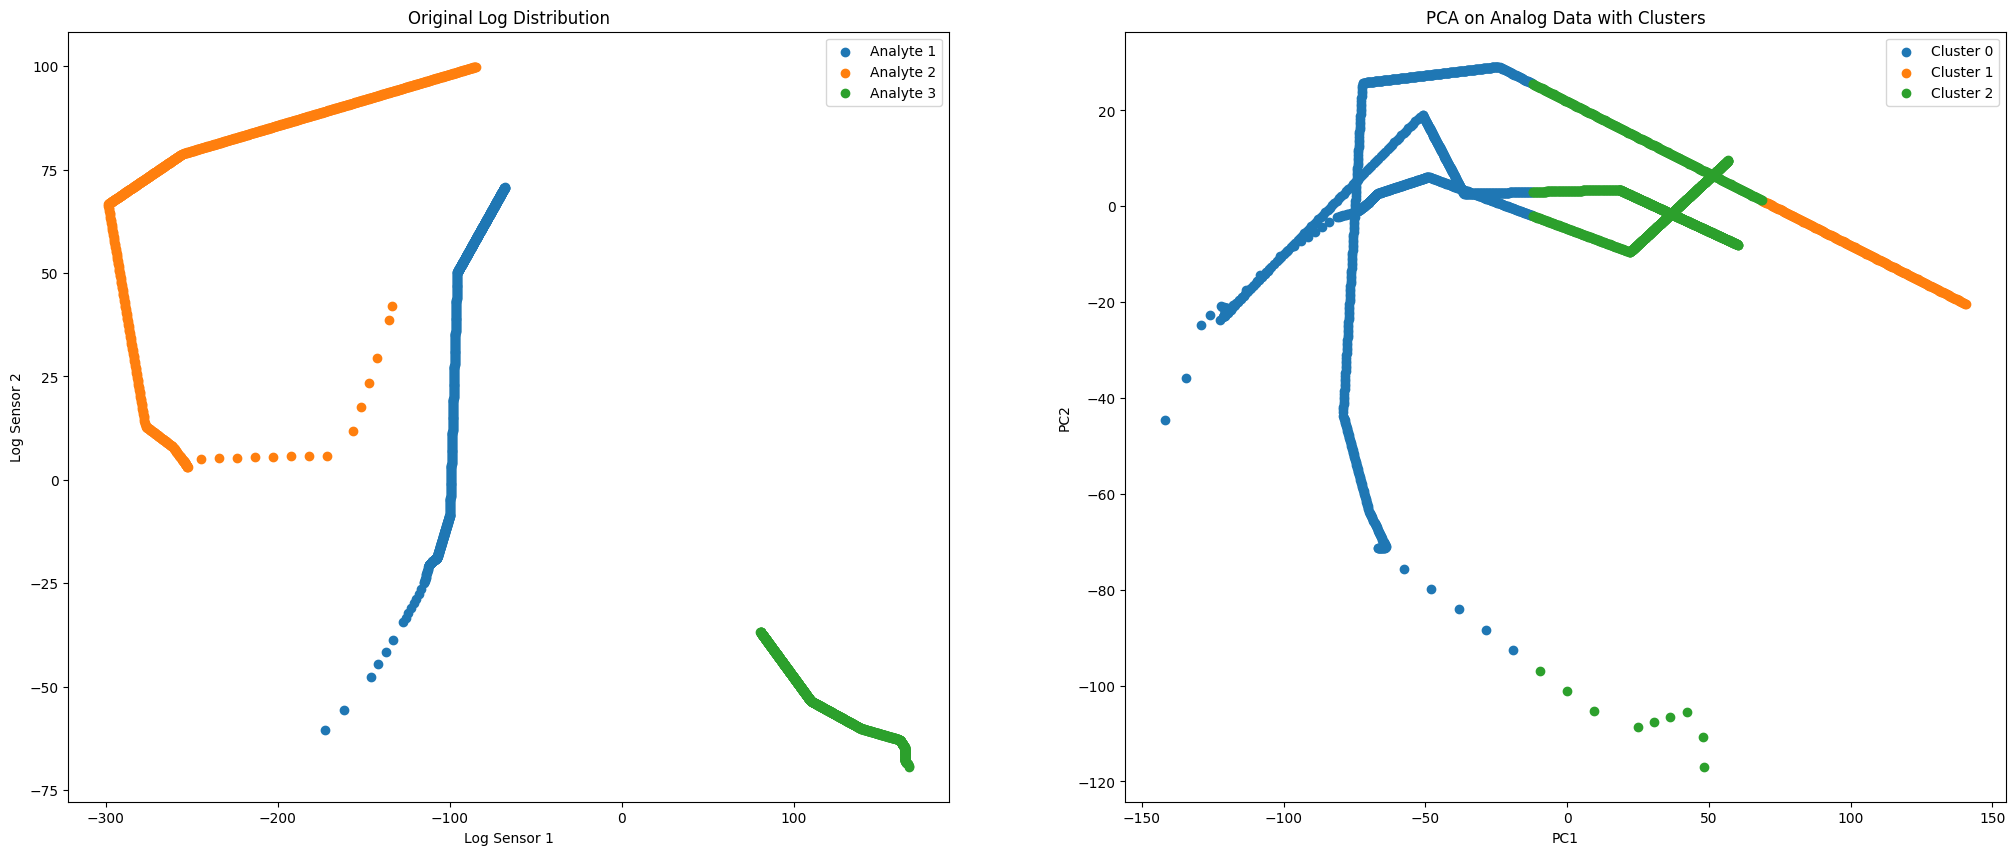

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['Sensor1'], analyte1['Sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['Sensor1'], analyte2['Sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['Sensor1'], analyte3['Sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 0]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 0]['PC2'], label='Cluster 0')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 1]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 1]['PC2'], label='Cluster 1')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 2]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 2]['PC2'], label='Cluster 2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA on Analog Data with Clusters')
ax[1].legend()

plt.show()

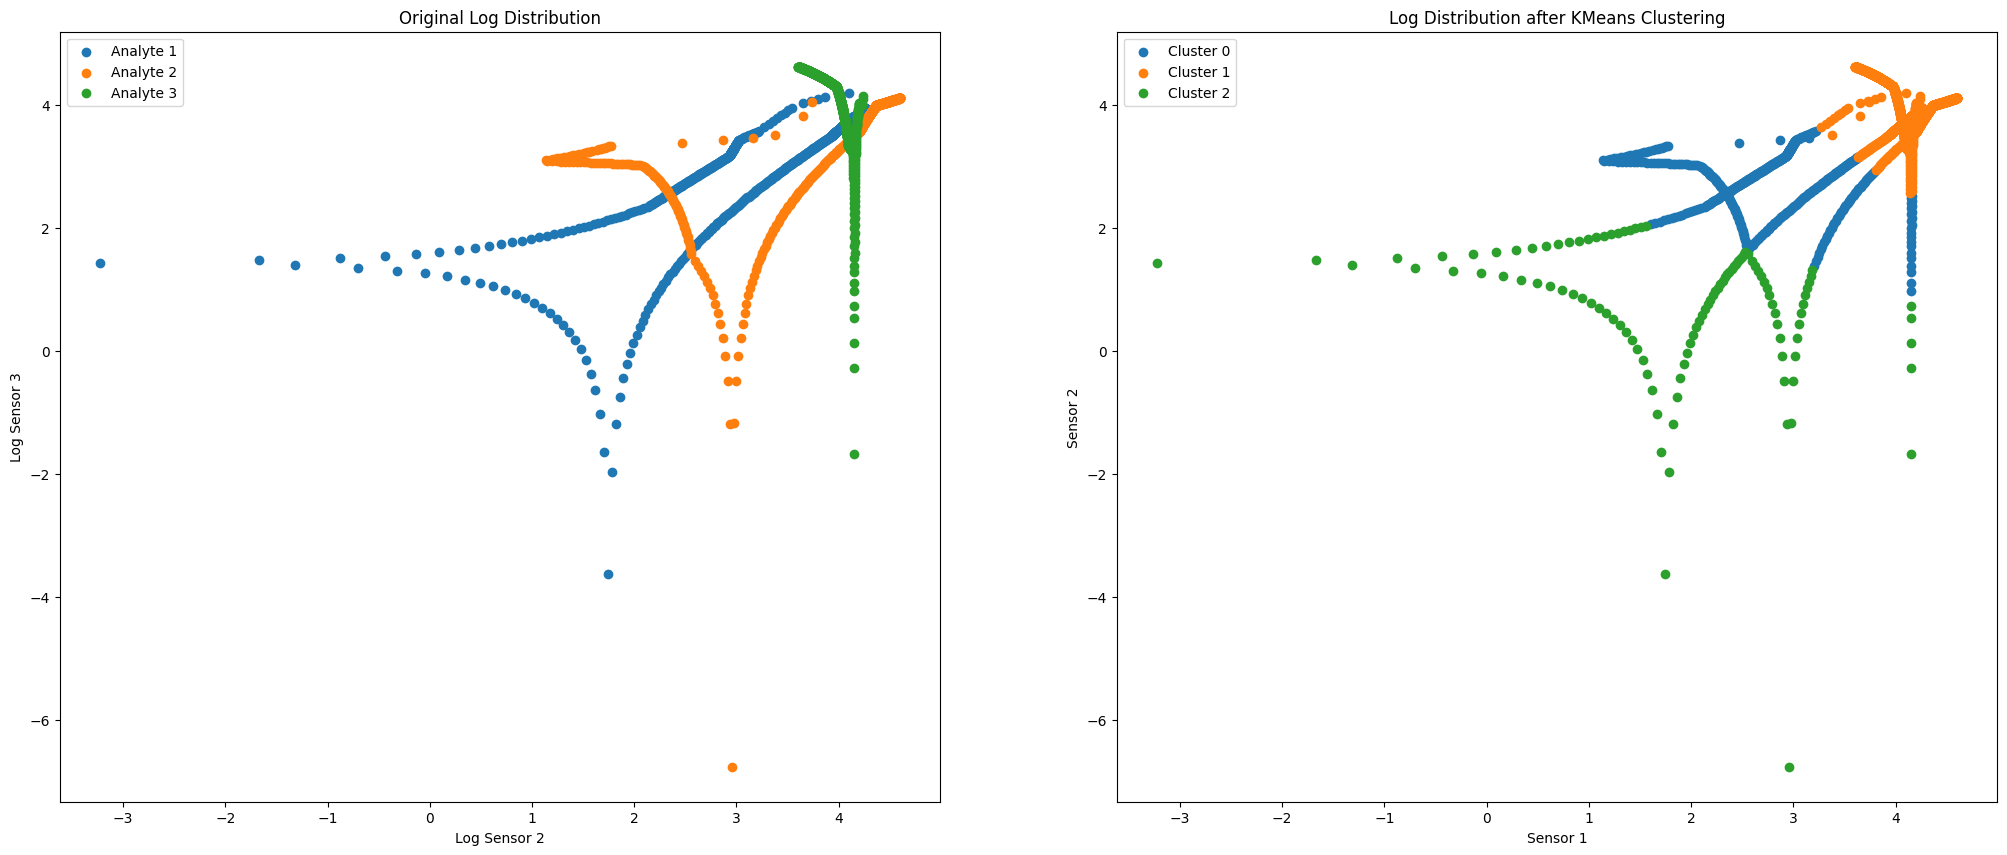

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(combined_data[['log_sensor2', 'log_sensor3']])
combined_data['cluster'] = kmeans.labels_

ax[1].scatter(combined_data[combined_data['cluster'] == 0]['log_sensor2'], combined_data[combined_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(combined_data[combined_data['cluster'] == 1]['log_sensor2'], combined_data[combined_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(combined_data[combined_data['cluster'] == 2]['log_sensor2'], combined_data[combined_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after KMeans Clustering')
ax[1].legend()

plt.show()

# DBSCAN Clustering

In [18]:
labelled_log_data = combined_data[['log_sensor1', 'log_sensor2', 'log_sensor3', 'cluster']]
labelled_data = combined_data[['Sensor1', 'Sensor2', 'Sensor3', 'cluster']]

/tmp/ipykernel_4022/3479921569.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = dbscan_model.labels_


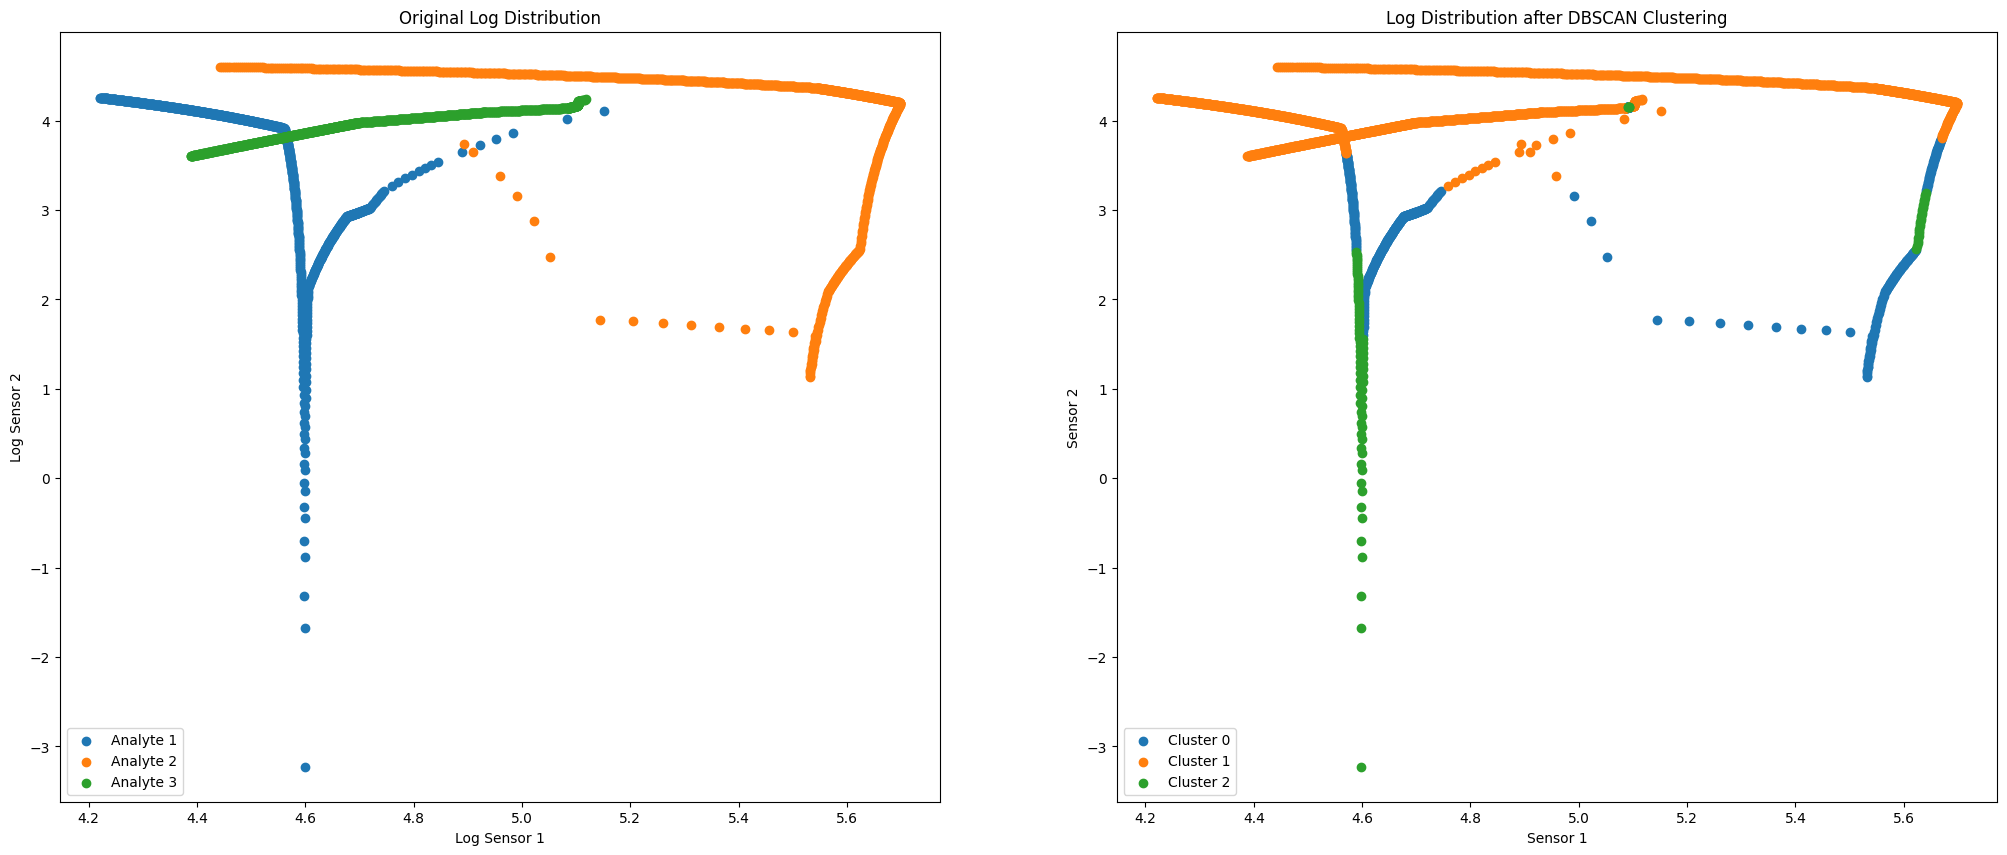

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = dbscan_model.labels_

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after DBSCAN Clustering')
ax[1].legend()    
plt.show()

/tmp/ipykernel_4022/4183497613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = dbscan_model.labels_


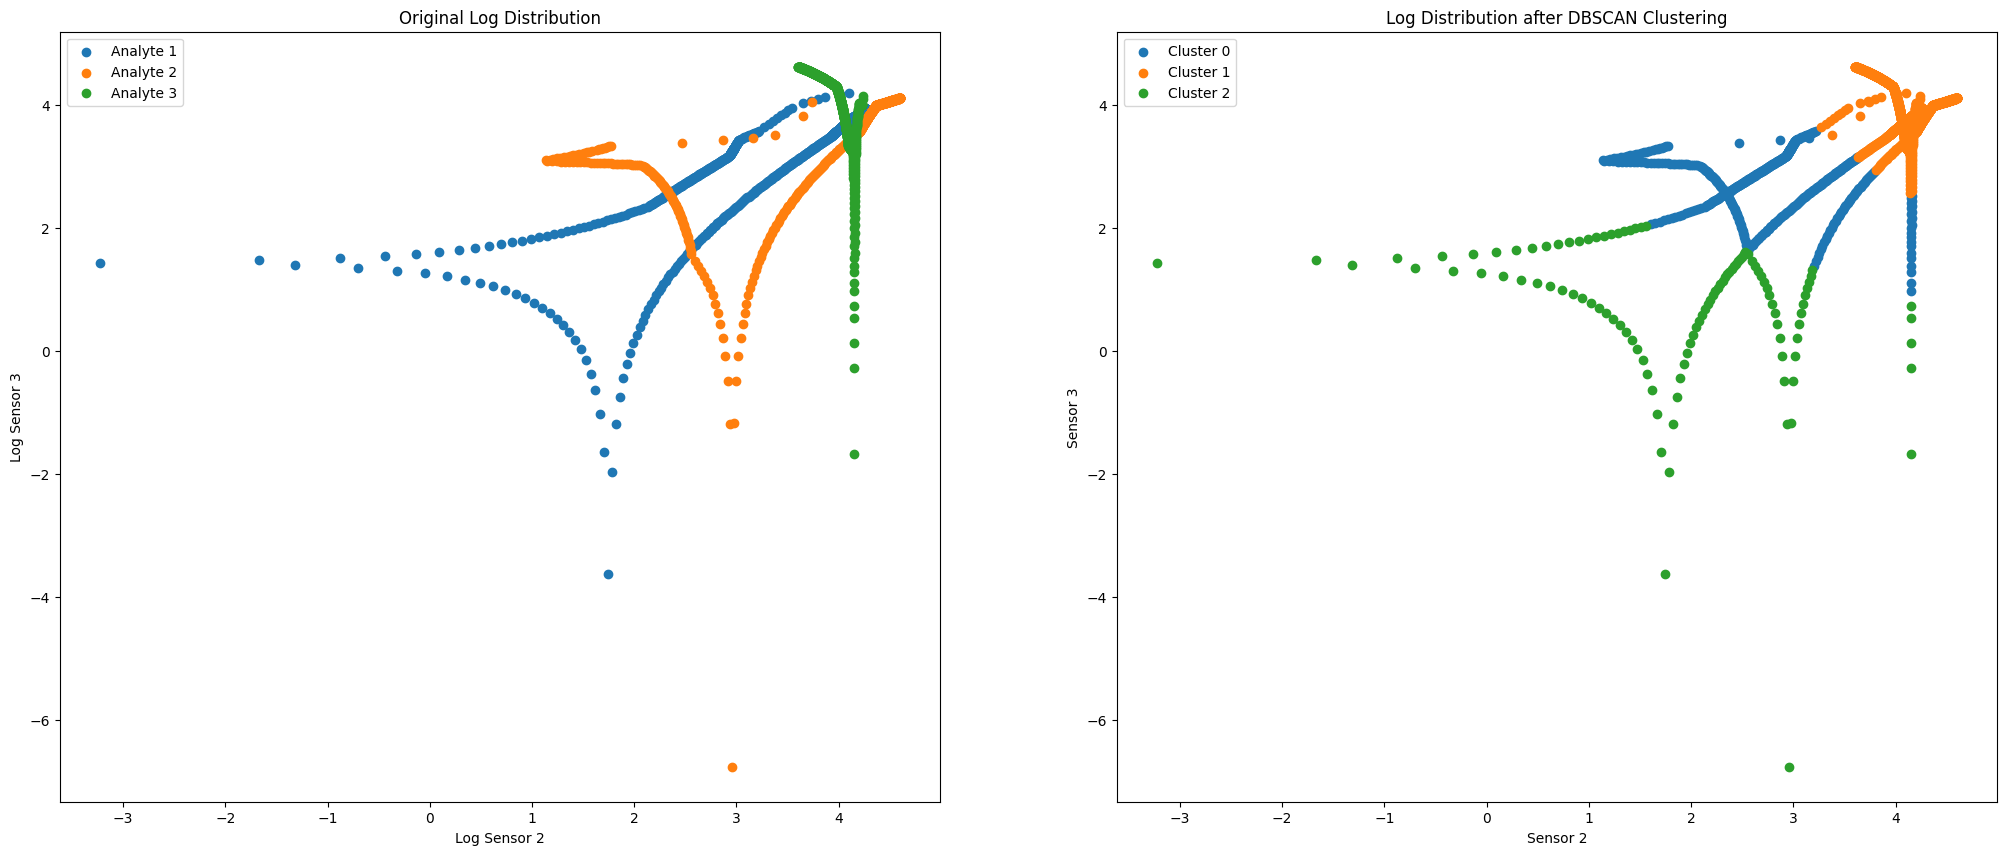

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = dbscan_model.labels_

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 2')
ax[1].set_ylabel('Sensor 3')
ax[1].set_title('Log Distribution after DBSCAN Clustering')
ax[1].legend()    
plt.show()

# Gaussian Mixture

/tmp/ipykernel_4022/1839205824.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])


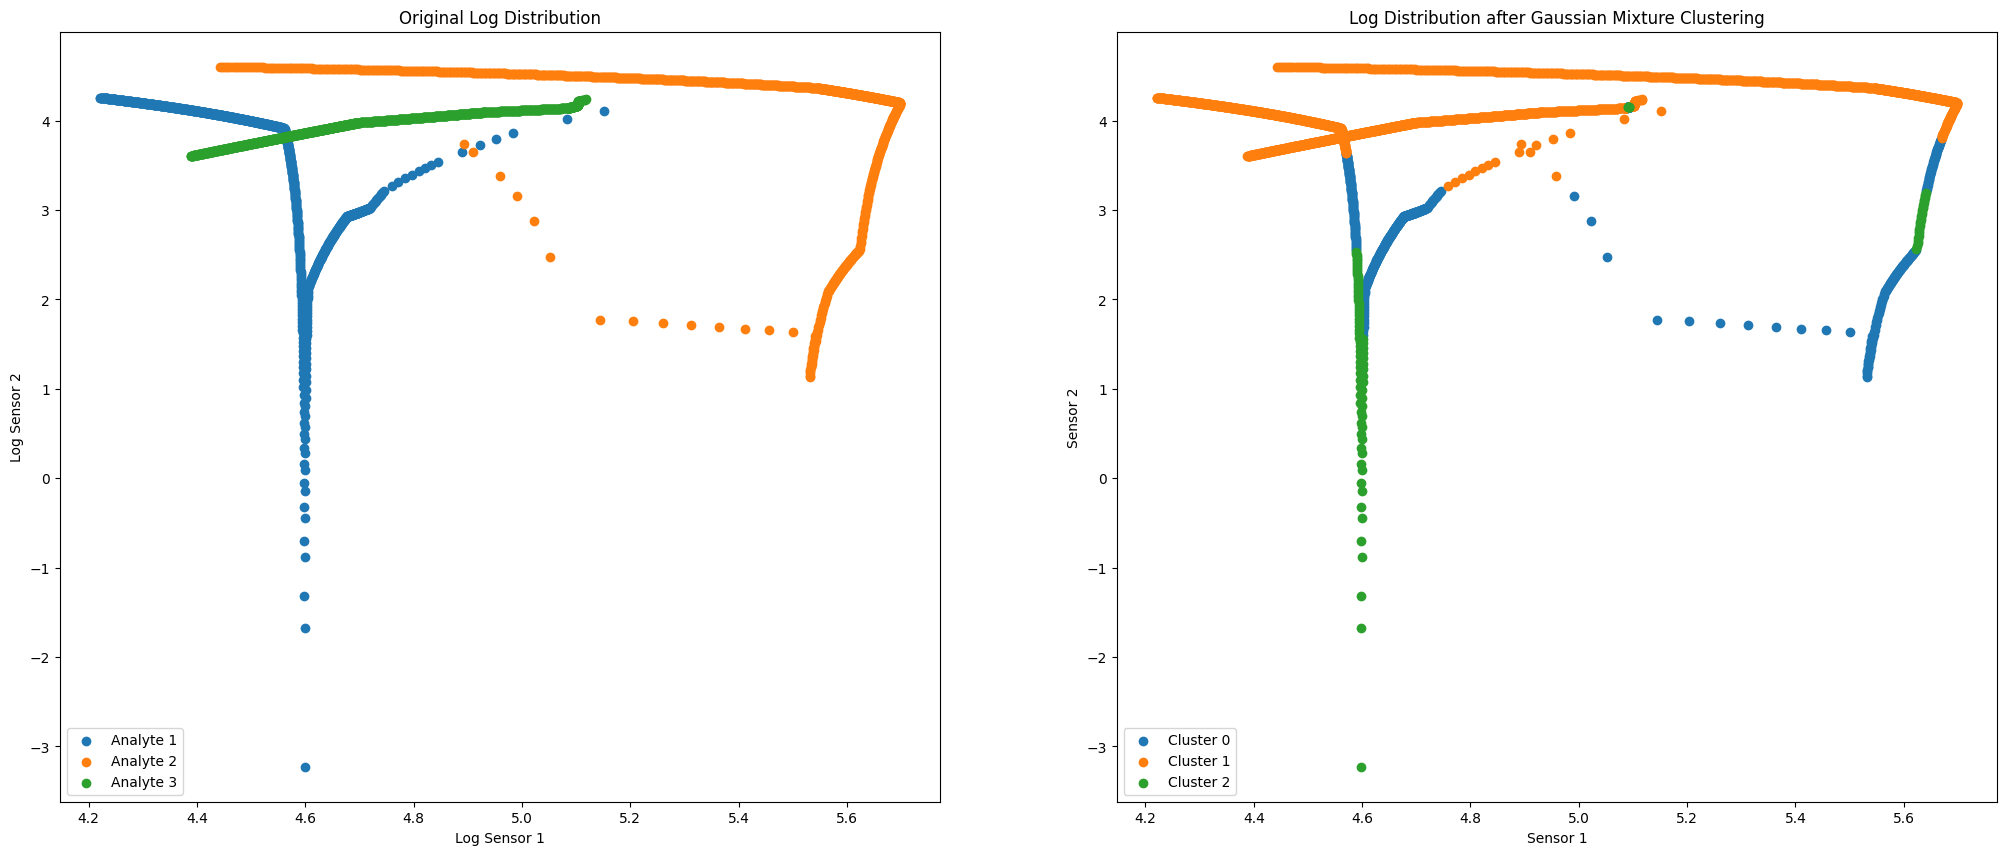

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

gmm = GaussianMixture(n_components=3)
gmm.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after Gaussian Mixture Clustering')
ax[1].legend()    
plt.show()

/tmp/ipykernel_4022/1712112201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])


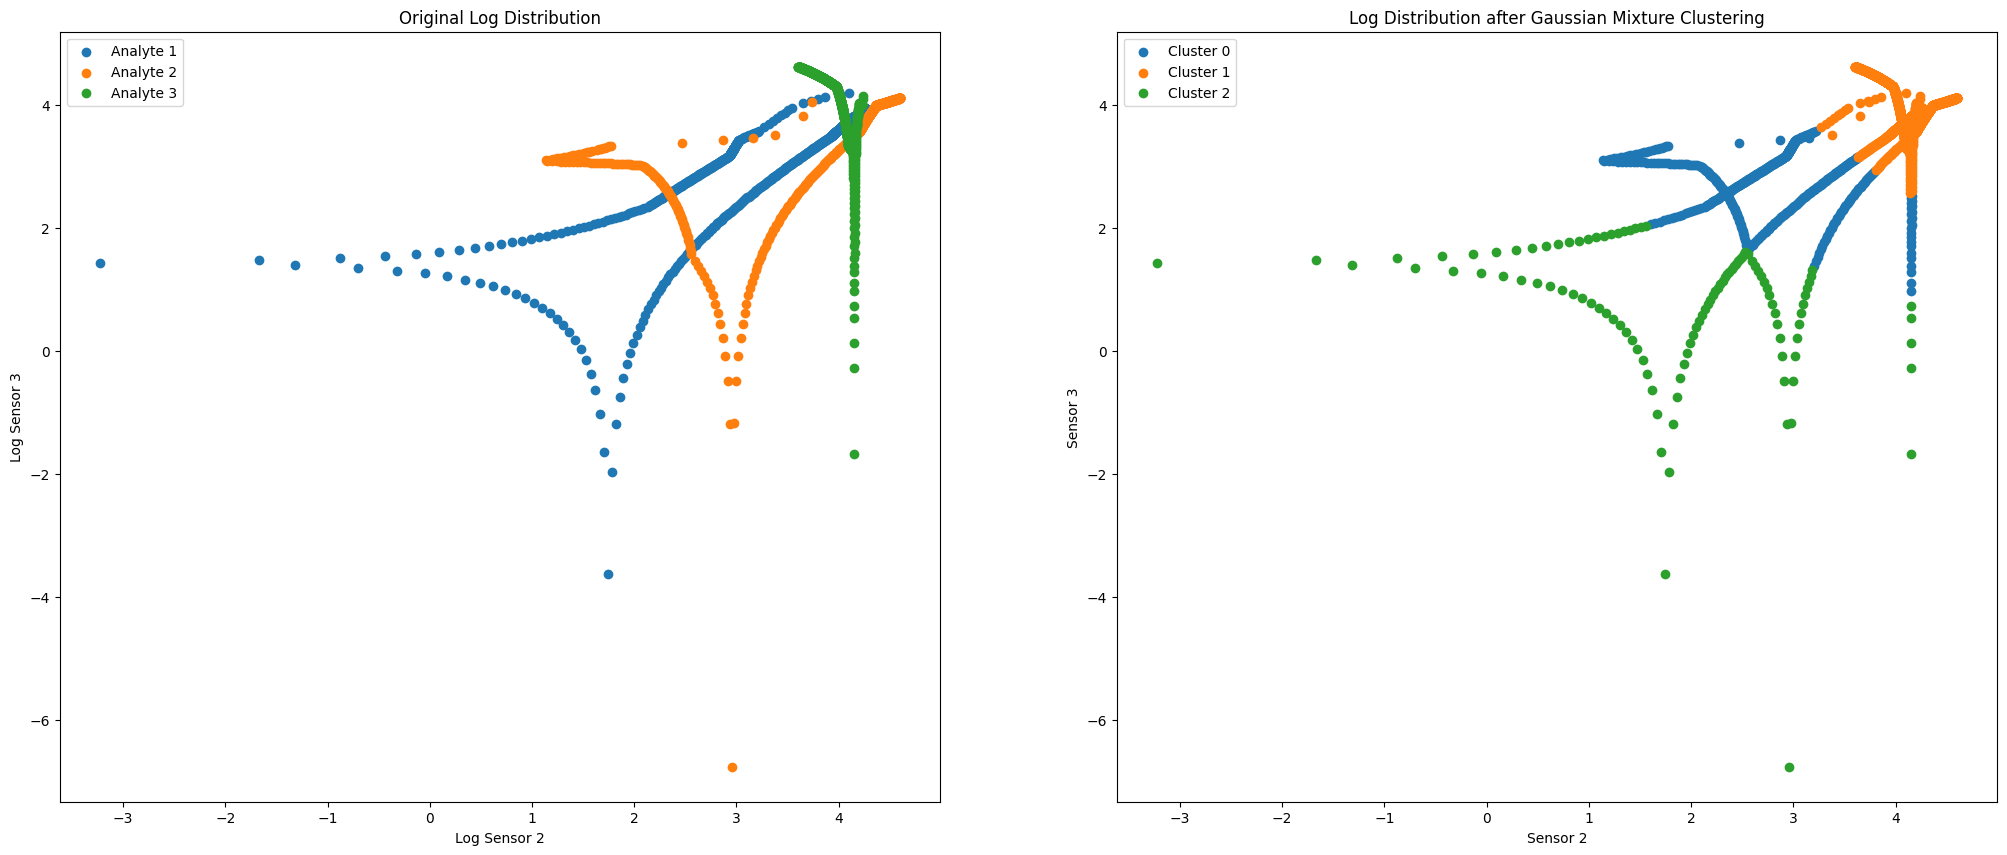

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

gmm = GaussianMixture(n_components=3)
gmm.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 2')
ax[1].set_ylabel('Sensor 3')
ax[1].set_title('Log Distribution after Gaussian Mixture Clustering')
ax[1].legend()    
plt.show()